## Creating An ANN Using Pytorch

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
import seaborn as sns
import numpy as np

In [5]:
df['Outcome'] = np.where(df['Outcome'] == 1,'Diabetic', 'No Diabetics') # This is optional, it only do to show in seaborn.

In [6]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,Diabetic
1,1,85,66,29,0,26.6,0.351,31,No Diabetics
2,8,183,64,0,0,23.3,0.672,32,Diabetic
3,1,89,66,23,94,28.1,0.167,21,No Diabetics
4,0,137,40,35,168,43.1,2.288,33,Diabetic


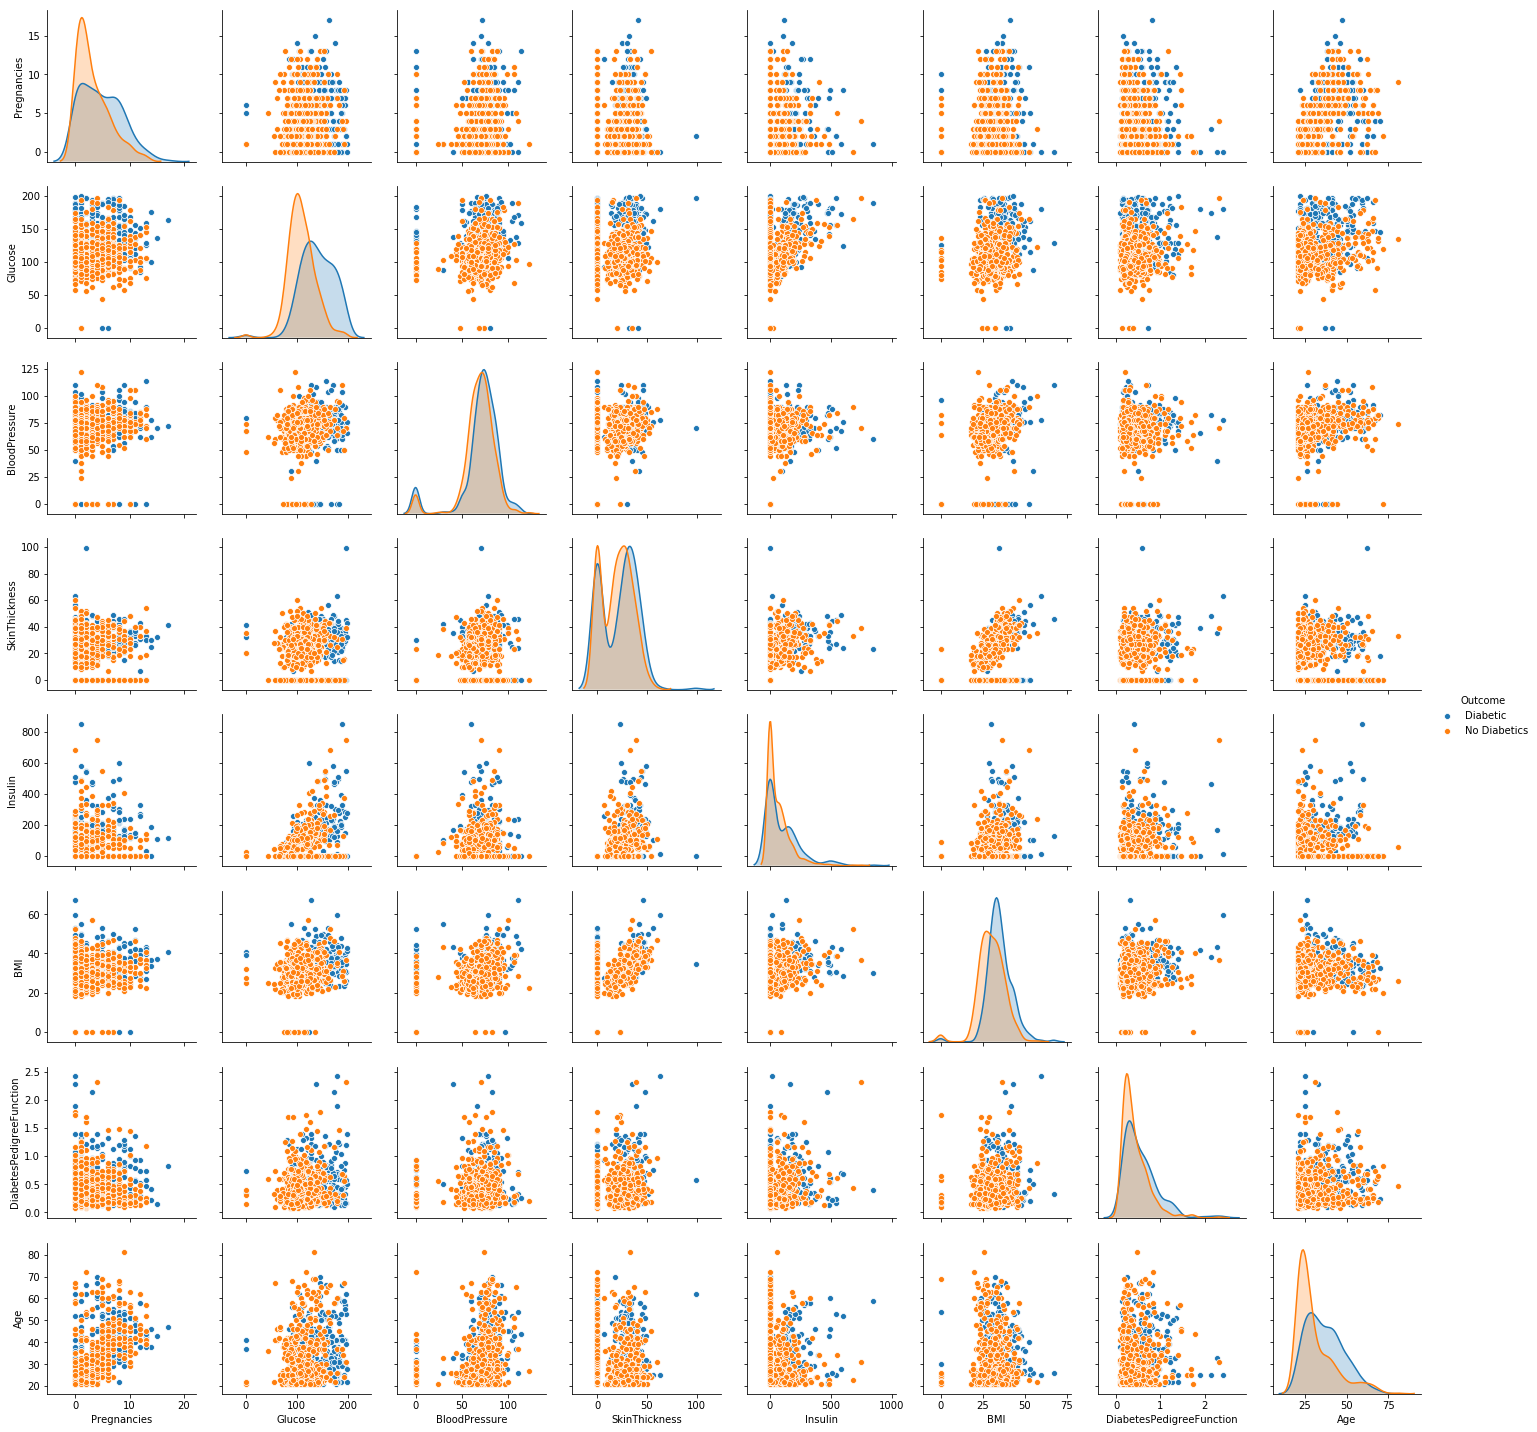

In [7]:
sns.pairplot(df,hue='Outcome') # hue parameter have always Dependent feature
# Here we get error because seaborn thinks that output variable is some categorical variable

In [33]:
# Here we reuired output variable as 1 and 0 so read dataset
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [34]:
X = df.drop('Outcome', axis=1).values ## Independent Features
y = df['Outcome'].values ## Dependent Features

In [35]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=0)
X_train.shape

(614, 8)

In [36]:
#### labries from pytorch
import torch
import torch.nn as nn
import torch.nn.functional as F

In [37]:
#### Creating a Tensors
#your indepenedent features needs to be converted into FloatTensor
X_train = torch.FloatTensor(X_train) 
X_test =  torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train) 
y_test  = torch.LongTensor(y_test)


In [38]:
df.shape

(768, 9)

In [51]:
#### Creating a model with pytorch

class ANN_Model(nn.Module):
    def __init__(self, input_features=8, hidden1=20, hidden2=20, out_features=2):
        super().__init__()
        self.f_connected1 = nn.Linear(input_features,hidden1)
        self.f_connected2 = nn.Linear(hidden1,hidden2)
        self.out = nn.Linear(hidden2,out_features)
    def forward(self,x):
        x= F.relu(self.f_connected1(x))
        x = F.relu(self.f_connected2(x))
        x = self.out(x)
        return x
    

In [52]:
#### instantiate my ANN_model
torch.manual_seed(20)
model = ANN_Model()

In [53]:
model.parameters

<bound method Module.parameters of ANN_Model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)>

In [54]:
model.parameters()

<generator object Module.parameters at 0x000002C911BEF4F8>

In [55]:
### Backward Propogation -- Define the loss_function,define the optimizer
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01) #lr-learning rate


In [56]:
epochs = 500
final_losses = []
for i in range(epochs):
    i=i+1
    y_pred = model.forward(X_train)
    loss=loss_function(y_pred, y_train)
    final_losses.append(loss)
    if i%10 == 1:
        print('Epoch number is :{} and the loss : {}'.format(i,loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch number is :1 and the loss : 3.457212209701538
Epoch number is :11 and the loss : 0.8019212484359741
Epoch number is :21 and the loss : 0.6090322732925415
Epoch number is :31 and the loss : 0.5917770266532898
Epoch number is :41 and the loss : 0.5679707527160645
Epoch number is :51 and the loss : 0.5529040098190308
Epoch number is :61 and the loss : 0.5410096645355225
Epoch number is :71 and the loss : 0.5310391783714294
Epoch number is :81 and the loss : 0.522036075592041
Epoch number is :91 and the loss : 0.5135970711708069
Epoch number is :101 and the loss : 0.5061254501342773
Epoch number is :111 and the loss : 0.49834126234054565
Epoch number is :121 and the loss : 0.49605482816696167
Epoch number is :131 and the loss : 0.4828636348247528
Epoch number is :141 and the loss : 0.4756038784980774
Epoch number is :151 and the loss : 0.4799228608608246
Epoch number is :161 and the loss : 0.479302316904068
Epoch number is :171 and the loss : 0.4650035500526428
Epoch number is :181 a

In [59]:
### Plot the loss function
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 0, 'Epoch')

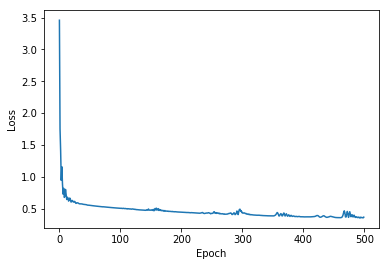

In [60]:
plt.plot(range(epochs), final_losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [61]:
#### Prediction in X_test data
predictions = []
for i,data in enumerate(X_test):
    print(model(data))
    

tensor([1.7826, 4.4327], grad_fn=<AddBackward0>)
tensor([ 2.3273, -1.0621], grad_fn=<AddBackward0>)
tensor([ 3.9183, -1.0604], grad_fn=<AddBackward0>)
tensor([0.2430, 0.8573], grad_fn=<AddBackward0>)
tensor([2.4953, 1.3410], grad_fn=<AddBackward0>)
tensor([ 3.7545, -1.5533], grad_fn=<AddBackward0>)
tensor([-0.9425,  1.5297], grad_fn=<AddBackward0>)
tensor([-0.1109,  1.6937], grad_fn=<AddBackward0>)
tensor([-0.3506, -0.4482], grad_fn=<AddBackward0>)
tensor([ 0.1436, -0.4835], grad_fn=<AddBackward0>)
tensor([-0.5880,  1.1035], grad_fn=<AddBackward0>)
tensor([-0.9974,  1.9822], grad_fn=<AddBackward0>)
tensor([2.6755, 1.0048], grad_fn=<AddBackward0>)
tensor([-2.3557,  0.7959], grad_fn=<AddBackward0>)
tensor([ 3.6754, -2.9178], grad_fn=<AddBackward0>)
tensor([2.4229, 0.3225], grad_fn=<AddBackward0>)
tensor([-0.1578,  1.5975], grad_fn=<AddBackward0>)
tensor([ 2.7172, -0.5640], grad_fn=<AddBackward0>)
tensor([1.9567, 1.5163], grad_fn=<AddBackward0>)
tensor([0.8109, 0.2028], grad_fn=<AddBackwa

In [64]:
#### Prediction in X_test data
predictions = []
with torch.no_grad():# This is used to avoid gradient 
    for i,data in enumerate(X_test):
        print(model(data))

tensor([1.7826, 4.4327])
tensor([ 2.3273, -1.0621])
tensor([ 3.9183, -1.0604])
tensor([0.2430, 0.8573])
tensor([2.4953, 1.3410])
tensor([ 3.7545, -1.5533])
tensor([-0.9425,  1.5297])
tensor([-0.1109,  1.6937])
tensor([-0.3506, -0.4482])
tensor([ 0.1436, -0.4835])
tensor([-0.5880,  1.1035])
tensor([-0.9974,  1.9822])
tensor([2.6755, 1.0048])
tensor([-2.3557,  0.7959])
tensor([ 3.6754, -2.9178])
tensor([2.4229, 0.3225])
tensor([-0.1578,  1.5975])
tensor([ 2.7172, -0.5640])
tensor([1.9567, 1.5163])
tensor([0.8109, 0.2028])
tensor([1.7813, 2.3900])
tensor([3.7594, 1.4071])
tensor([1.3501, 0.7533])
tensor([ 5.7470, -4.7081])
tensor([ 2.4154, -2.0050])
tensor([1.6529, 1.7146])
tensor([3.0254, 0.5097])
tensor([-1.3028,  1.4128])
tensor([2.6048, 0.8206])
tensor([2.4637, 1.3278])
tensor([0.5913, 0.4100])
tensor([1.2010, 0.3025])
tensor([ 1.1318, -0.6499])
tensor([-0.3052,  0.6286])
tensor([2.1882, 0.9102])
tensor([3.6948, 4.6652])
tensor([-0.2666,  0.7513])
tensor([ 3.9941, -0.9735])
tensor([0.

In [70]:
#### Prediction in X_test data
predictions = []
with torch.no_grad():# This is used to avoid gradient 
    for i,data in enumerate(X_test):
        #print(model(data))
        y_pred = model(data)
        predictions.append(y_pred.argmax().item())
        print(y_pred.argmax().item())
    

1
0
0
1
0
0
1
1
0
0
1
1
0
1
0
0
1
0
0
0
1
0
0
0
0
1
0
1
0
0
0
0
0
1
0
1
1
0
0
1
0
0
0
1
1
0
0
0
1
0
0
0
1
0
0
1
0
0
0
0
1
0
0
1
1
1
0
0
0
0
0
0
0
1
1
0
0
1
0
0
0
1
0
0
0
0
0
0
1
0
0
0
0
0
1
0
0
0
1
0
0
0
0
0
1
1
0
0
0
1
0
1
1
0
0
0
0
1
0
1
0
1
0
0
0
0
0
0
0
0
1
0
0
1
0
1
0
0
1
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0


In [71]:
predictions

[1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0]

In [72]:
# compare prediction data with xtest data
from sklearn.metrics import confusion_matrix
cm = confusion_matrixrix(y_test,predictions)
cm

array([[92, 15],
       [17, 30]], dtype=int64)

Text(69.0, 0.5, 'Predicted Values')

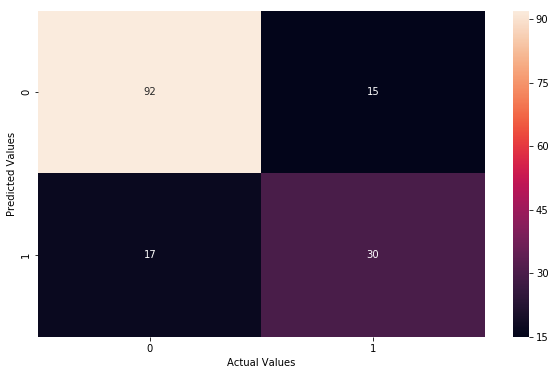

In [74]:
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [76]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, predictions)
score

0.7922077922077922

In [77]:
#### Save the model
torch.save(model, 'diabetes.pt')

D:\anaconda3\envs\envpytorch\lib\site-packages\torch\serialization.py:402: UserWarning: Couldn't retrieve source code for container of type ANN_Model. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [78]:
#### Save and Load the model
model = torch.load('diabetes.pt')

In [79]:
model.eval()

ANN_Model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)

In [80]:
### Prediction of new data point
list(df.iloc[0,:-1])

[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0]

In [81]:
### New Data
lst1 = [6.0, 130.0, 72.0, 40.0, 0.0, 25.6, 0.627, 45.0]

In [82]:
new_data = torch.tensor(lst1)

In [83]:
#### Prediction new data using pytorch

with torch.no_grad():# This is used to avoid gradient 
    print(model(new_data))
    print(model(new_data).argmax().item())
    

tensor([1.5250, 1.1423])
0
